# Effectiveness analysis 
It comprises multiple performance tests.

Following steps:
    1. Load models and test datasets 
    2. Create metrics
    3. Effectiveness analysis:
        - Model performance
        - Tree-wise performance
        - Query-wise performance
        - Query class performance
        - Document graded-relevance performance
        - Rank confusion matrix
        

#### Essential imports

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import xarray as xr

# Useful to reload the module without having to restart the notebook kernel
import rankeval.analysis.effectiveness
import rankeval.visualization.effectiveness
import rankeval.core.metrics

#### Data file setup

In [2]:
data_dir = '/Users/muntean/Documents/workspace/quickranktestdata'

# Dataset MSN with 2 models
data_file_msn_train = os.path.join(data_dir, "msn1/msn1.fold1.train.5k.txt")
data_file_msn_valid = os.path.join(data_dir, "msn1/msn1.fold1.vali.5k.txt")
data_file_msn_test = os.path.join(data_dir, "msn1/msn1.fold1.test.5k.txt")
model_file_50 = os.path.join(data_dir, "new.mart.50.xml")
model_file_100 = os.path.join(data_dir, "new.lmart.100.xml")

# Dataset Istella with one model
data_file_istella = "/Users/muntean/Documents/workspace/quickranktestdata/tiscali/tiscali.sample.txt"
model_file_500 = "/Users/muntean/Documents/workspace/quickranktestdata/tiscali/lambdamart-500-alberi-50-leaves.xml"

# Loading models, datasets from file

In [3]:
# Loading Models
from rankeval.core.model import RTEnsemble

msn_mart_50 = RTEnsemble(model_file_50, name="MART-50", format="QuickRank")
msn_lmart_100 = RTEnsemble(model_file_100, name="MART-100", format="QuickRank")
istella_lmart_500 = RTEnsemble(model_file_500, name="LMART-500", format="QuickRank")

In [4]:
#Loading Datasets
from rankeval.core.dataset import Dataset

#istella
istella_test = Dataset.load(data_file_istella, name="Istella-S Test", format="svmlight")

#msn
msn_train = Dataset.load(data_file_msn_train, name="MSN Train", format="svmlight")
msn_validation = Dataset.load(data_file_msn_valid, name="MSN Valid", format="svmlight")
msn_test = Dataset.load(data_file_msn_test, name="MSN Test", format="svmlight")

### Create metrics 

In [5]:
from rankeval.core.metrics import Precision, Recall, NDCG

precision_10 = Precision(cutoff=10)
recall_10 = Recall(cutoff=10)
ndcg_10 = NDCG(cutoff=10, no_relevant_results=0.5, implementation='exp')

# Effectiveness analysis
Evaluate the effectiveness of a set of models over several datasets and using a set of metrics

##  1. Model performance

- Compute the model performance analysis
- Display results
- Plot results

#### -> Compute the model performance analysis

In [6]:
from rankeval.analysis.effectiveness import model_performance

# Istella
istella_model_perf = model_performance(datasets=[istella_test], 
                           models=[istella_lmart_500], 
                           metrics=[precision_10, recall_10, ndcg_10])
print istella_model_perf
print 

# MSN5k
msn_model_perf = model_performance(datasets=[msn_test], 
                       models=[msn_mart_50, msn_lmart_100], 
                       metrics=[precision_10, recall_10, ndcg_10])
print msn_model_perf

<xarray.DataArray 'Model Performance' (dataset: 1, model: 1, metric: 3)>
array([[[ 0.7837  ,  0.707386,  0.74588 ]]], dtype=float32)
Coordinates:
  * dataset  (dataset) object Istella-S Test
  * model    (model) object LMART-500
  * metric   (metric) object Precision@10[>=1] Recall@10[>=1] NDCG@10

<xarray.DataArray 'Model Performance' (dataset: 1, model: 2, metric: 3)>
array([[[ 0.660465,  0.183826,  0.440821],
        [ 0.644186,  0.178694,  0.466022]]], dtype=float32)
Coordinates:
  * dataset  (dataset) object MSN Test
  * model    (model) object MART-50 MART-100
  * metric   (metric) object Precision@10[>=1] Recall@10[>=1] NDCG@10


Each analysis returns a **xarray.DataArray** data structure. xarray is an extension of the famous pandas package offering similar features and capabilities but supporting multi-dimensional data structures (with a number of dimension potentially much greater than 2)"

#### -> Display results in a tabular view

In [7]:
from rankeval.visualization.effectiveness import pretty_print_model_performance

pretty_print_model_performance(istella_model_perf)
pretty_print_model_performance(msn_model_perf)

metric,Precision@10[>=1],Recall@10[>=1],NDCG@10
model,,,
LMART-500,0.7837,0.707386,0.74588


metric,Precision@10[>=1],Recall@10[>=1],NDCG@10
model,,,
MART-50,0.660465,0.183826,0.440821
MART-100,0.644186,0.178694,0.466022


#### -> Plot results

**plot_model_performance** takes as input:
    - the model_performance xarray (object) for given combinations of: dataset(s), model(s) and metric(s)
    - compare: str
        - the allowed values are: "models" and "metrics"
        - it allows the user to compare models or metrics
    - show values: bool
        - shows the actual values on the plotted bars

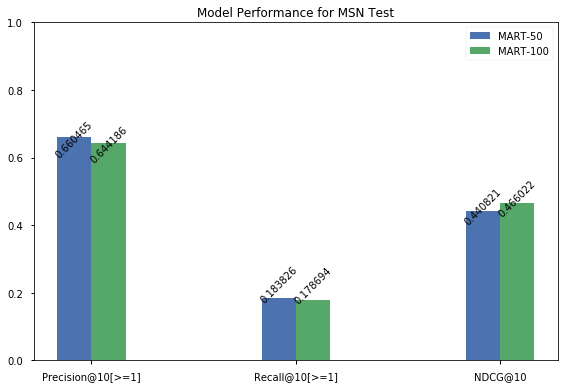

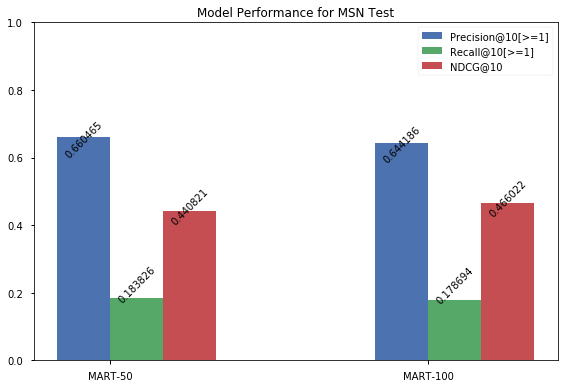

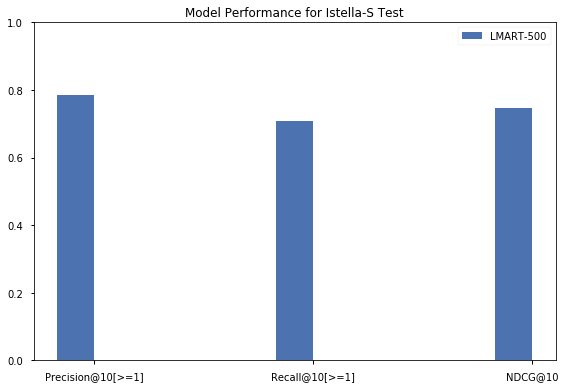

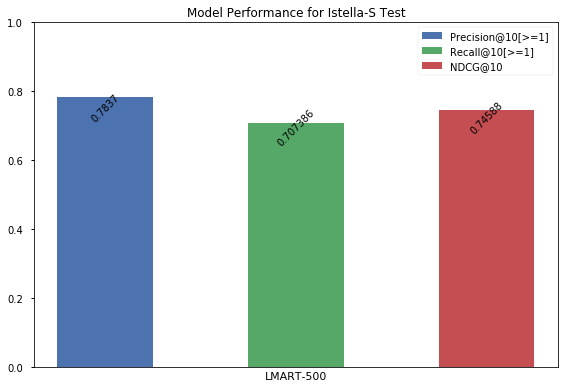

In [8]:
from rankeval.visualization.effectiveness import plot_model_performance

# MSN
plot_model_performance(msn_model_perf, compare="models",  show_values=True)
plot_model_performance(msn_model_perf, compare="metrics", show_values=True)

# Istella
plot_model_performance(istella_model_perf) 
plot_model_performance(istella_model_perf, compare="metrics", show_values=True) 


##  2. Tree-Wise Performance

- Compute the model performance analysis
- Plot results

#### -> Compute tree-wise performance analysis

In [21]:
from rankeval.analysis.effectiveness import tree_wise_performance

istella_tree_wise_perf = tree_wise_performance(datasets=[istella_test], 
                           models=[istella_lmart_500], 
                           metrics=[precision_10, recall_10, ndcg_10],
                           step=10)
print istella_tree_wise_perf

msn_tree_wise_perf = tree_wise_performance(datasets=[msn_test], 
                           models=[msn_mart_50, msn_lmart_100], 
                           metrics=[precision_10, recall_10, ndcg_10],
                           step=10)
print msn_tree_wise_perf

#### test this later, some error when more datasets
msn_valid_tree_wise_perf = tree_wise_performance(datasets=[msn_validation, msn_test], 
                           models=[msn_mart_50], 
                           metrics=[precision_10, recall_10, ndcg_10],
                           step=10)
print msn_valid_tree_wise_perf

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### -> Plot results

**plot_model_performance** takes as input:
    - the model_performance xarray (object) for given combinations of: dataset(s), model(s) and metric(s)
    - compare: str
        - the allowed values are: "models" and "metrics"
        - it allows the user to compare models or metrics
    

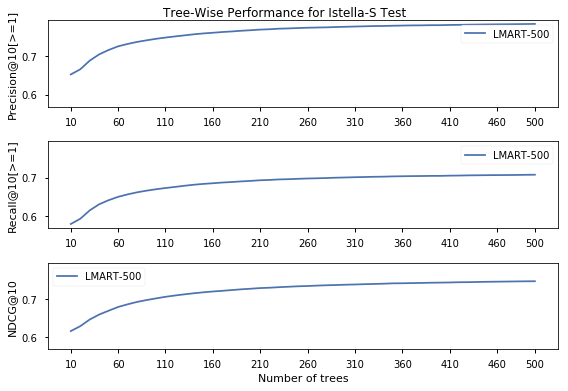

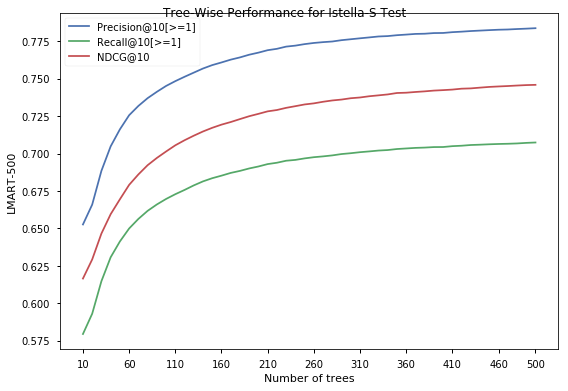

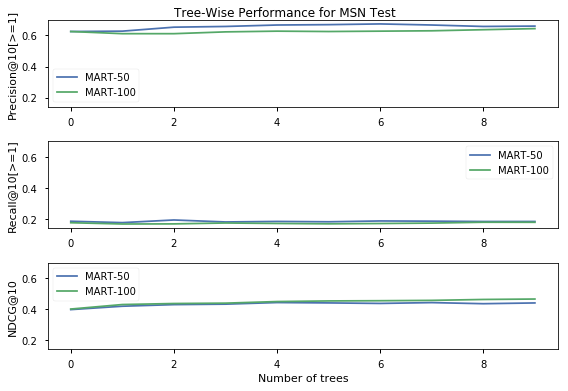

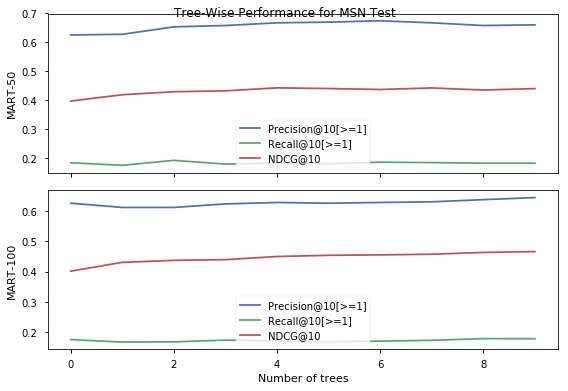

In [20]:
from rankeval.visualization.effectiveness import plot_tree_wise_model_performance

plot_tree_wise_model_performance(istella_tree_wise_perf, compare = "models")
plot_tree_wise_model_performance(istella_tree_wise_perf, compare = "metrics")


plot_tree_wise_model_performance(msn_tree_wise_perf, compare = "models") 
plot_tree_wise_model_performance(msn_tree_wise_perf, compare = "metrics")

# TRY this later after fix from Salvo for multiple datasets
plot_tree_wise_model_performance(msn_valid_tree_wise_perf, compare = "models")
plot_tree_wise_model_performance(msn_valid_tree_wise_perf, compare = "datasets")